## Import functions 

#### <span style="color:red">*JUST RUN CELL*</span>


In [25]:
import os 
import sys
import numpy as np
#os.chdir(os.path.join("/home/datawork-osmose/",'osmoseNotebooks_v0','source'))

os.chdir(os.path.join("/home/datawork-osmose/osmoseNotebooks_v0/source/Functions_AI"))
from ApplyModelOnEvalSet import ApplyModelOnEvalSet_main, LoadModelHyperParameters
from launcher_datasetScale import list_datasets
from Check_files_in_AI_folders import CheckAvailableAI_tasks_BM_model, CheckAvailableAI_DataSplit, CheckAvailableAI_TrainedNetwork


## Selection of dataset, task, benchmark and model

#### <span style="color:red">*RUN CELL & FILL*</span>

- ``dataset_ID`` : nom du jeu de données à traiter


In [26]:
list_datasets()

Available datasets:
  - Glider


In [27]:
dataset_ID = 'Glider'

#display_metadata(dataset_ID)

#### <span style="color:red">*RUN CELL & FILL*</span>

It will print all the folder in the AI branch.

- `` Task_ID `` : The First Level is for the Task.    (nb : for now, only 'Task1_DetWeakLabel' available)
- ``BM_Name`` : The Second Level is for the BenchMark - . A BenchMark is composed by different model that will be compared. (Different architecture, different dataset subdivision, differents representation, ...)
- The Third Level is for the dataset used - same notation than the folder that contains specrograms : "analysis_sf"_"LengthFile"
    - ``analysis_fs`` : Fréquence d'échantillonnage des fichier à traiter (en Hz)
    - ``LengthFile`` : Durée (en secondes) des fichiers à traiter

In [28]:
CheckAvailableAI_tasks_BM_model(dataset_ID)

/
Task1_DetWeakLabel/
    DetWL_BlueWhaleAus/
        50_500/


In [29]:
# Select Task_ID :
Task_ID = 'Task1_DetWeakLabel'
# Select BM_Name :
BM_Name = 'DetWL_BlueWhaleAus'

# Select analysis_fs and LengthFile :
analysis_fs = 500 #Hz
LengthFile = 50 #s

In [30]:
print('MODELS AVAILABLE : ')
CheckAvailableAI_TrainedNetwork(dataset_ID, Task_ID, BM_Name, LengthFile, analysis_fs)

MODELS AVAILABLE : 
models/
    V1_resnet18_pt/
    V1_resnet18_no_pt/
    V1_resnet50_pt/
    V1_VGG_pt/
    V1_SimpleCNN3/
    V1_SimpleCNN3_t2/
    V1_VGG19bn_pt/


In [31]:
VersionName = 'V1_VGG19bn_pt'

In [32]:
Dyn, batch_size, learning_rate, LabelsList, ModelName, use_pretrained, SplitName, TrainSetRatio = LoadModelHyperParameters(dataset_ID, Task_ID, BM_Name, LengthFile, analysis_fs, VersionName)

print('-- INFOS --')
if use_pretrained == True:
    print('MODEL ARCHITECTURE : '+ str(ModelName) + ' (with pretrained weigth)')
if use_pretrained == False:
    print('MODEL ARCHITECTURE : '+ str(ModelName) + ' (without pretrained weigth)')
    
print('Trained with the datasplit : ', SplitName)
print('With the hyper parameters : ')
print(' - Batch Size : ', batch_size)
print(' - Learning Rate : ', learning_rate)
print(' - TrainSetRatio :', TrainSetRatio)



-- INFOS --
MODEL ARCHITECTURE : vgg19_bn (with pretrained weigth)
Trained with the datasplit :  FullyRandom_v1
With the hyper parameters : 
 - Batch Size :  10
 - Learning Rate :  0.0001
 - TrainSetRatio : 0.9


## Apply Network on all evaluation set

100%|██████████| 49400/49400 [10:34<00:00, 77.92it/s]


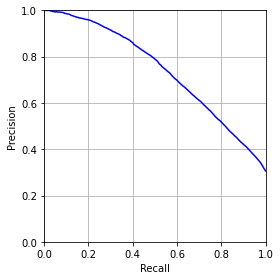

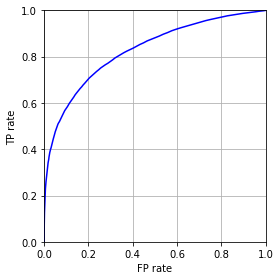

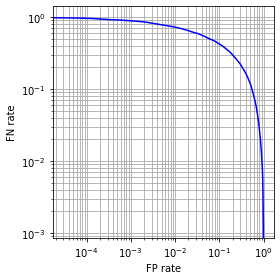

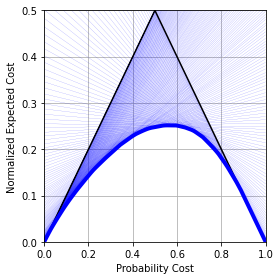

In [33]:
ApplyModelOnEvalSet_main(dataset_ID, Task_ID, BM_Name, LengthFile, analysis_fs, VersionName, Dyn, list(LabelsList), str(SplitName))